In [ ]:
#Voice input

In [47]:
import speech_recognition as sr

r = sr.Recognizer()
with sr.Microphone() as source:
    print("Speak Anything :")
    audio = r.listen(source)
    try:
        text = r.recognize_google(audio)
        print("You said : {}".format(text))
    except:
        print("Sorry could not recognize what you said")

Speak Anything :
You said : High Court justice under the law that every American receives equal treatment in every and 14 spirit college


In [48]:
f= open("test.txt","w+")
f.close()


with open("test.txt", "w+",) as f:
    f.write(text)

In [16]:
#read from file & speak
#!pip install gTTS

  Created wheel for gtts-token: filename=gTTS_token-1.1.3-py3-none-any.whl size=4100 sha256=965c94862d7b3ffd8cf30a5bc61a51d7d67378d5030c322125da288b437196ba
  Stored in directory: c:\users\tanis\appdata\local\pip\cache\wheels\6d\ae\7f\0d768fed29681475722161468bddc6220c1db2dbc18c832ce5
Successfully built gtts-token


In [49]:
from gtts import gTTS

import os

f=open('test.txt')
x=f.read()

language='en'

audio=gTTS(text=x,lang=language,slow=False)

audio.save("test.mp3")
os.system("test.mp3")

0

In [1]:
#sentiment analyser 
#import nltk
#nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

[]
Counter()
Positive Sentiment


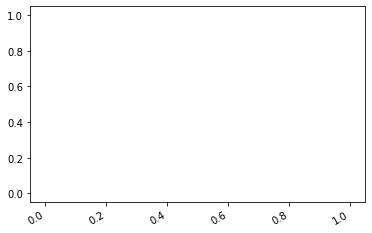

In [50]:
import string
from collections import Counter

import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

text = open('test.txt', encoding='utf-8').read()
lower_case = text.lower()
cleaned_text = lower_case.translate(str.maketrans('', '', string.punctuation))

# Using word_tokenize because it's faster than split()
tokenized_words = word_tokenize(cleaned_text, "english")

# Removing Stop Words
final_words = []
for word in tokenized_words:
    if word not in stopwords.words('english'):
        final_words.append(word)

# Lemmatization - From plural to single + Base form of a word (example better-> good)
lemma_words = []
for word in final_words:
    word = WordNetLemmatizer().lemmatize(word)
    lemma_words.append(word)

emotion_list = []
with open('emotions.txt', 'r') as file:
    for line in file:
        clear_line = line.replace("\n", '').replace(",", '').replace("'", '').strip()
        word, emotion = clear_line.split(':')

        if word in lemma_words:
            emotion_list.append(emotion)

print(emotion_list)
w = Counter(emotion_list)
print(w)


def sentiment_analyse(sentiment_text):
    score = SentimentIntensityAnalyzer().polarity_scores(sentiment_text)
    if score['neg'] > score['pos']:
        print("Negative Sentiment")
    elif score['neg'] < score['pos']:
        print("Positive Sentiment")
    else:
        print("Neutral Sentiment")


sentiment_analyse(cleaned_text)

fig, ax1 = plt.subplots()
ax1.bar(w.keys(), w.values())
fig.autofmt_xdate()
plt.savefig('graph.png')
plt.show()